<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from os import device_encoding
book = pd.read_csv("/content/book (2).csv" , encoding= 'latin=1' , index_col='Unnamed: 0')
book.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [3]:
book.tail()

,User.ID,Book.Title,Book.Rating
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8
10000,162129,Kids Say the Darndest Things,6


In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [5]:
book['Book.Title'] = book['Book.Title'].astype('category')

In [6]:
book.duplicated().sum()

2

In [7]:
duplicated = book[book.duplicated()]

In [8]:
duplicated

,User.ID,Book.Title,Book.Rating
5052,2152,Le nouveau soleil de Teur,7
7440,3757,The Magician's Tale,7


In [9]:
# rename the column name
df = book.rename({'Book.Rating':'rating'},axis=1)

In [10]:
df

,User.ID,Book.Title,rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [11]:
df.nunique()

User.ID       2182
Book.Title    9659
rating          10
dtype: int64

In [12]:
df['rating'].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: rating, dtype: int64

<Axes: >

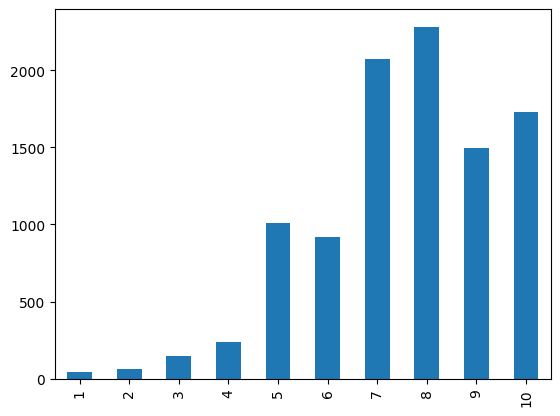

In [13]:
df['rating'].value_counts().sort_index().plot(kind='bar')

In [14]:
import seaborn as sns

<Figure size 2000x800 with 0 Axes>

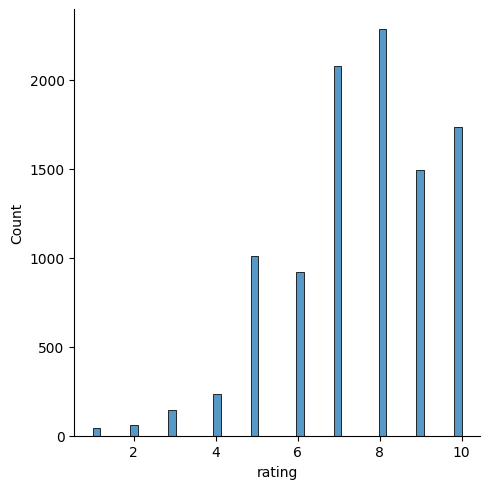

In [15]:
plt.figure(figsize=(20,8))
sns.displot(df.rating)

**create the user_book_matrix**

In [16]:
user_book_matrix = df.pivot_table(index='User.ID', columns='Book.Title',values='rating')

In [17]:
user_book_matrix

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [18]:
user_book_matrix.fillna(0 , inplace=True)
user_book_matrix.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**create the user_similarity_matrix**

In [19]:
user_similarity_matrix = cosine_similarity(user_book_matrix)

In [20]:
user_similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
type(user_similarity_matrix)

numpy.ndarray

In [22]:
np.fill_diagonal(user_similarity_matrix,0)

In [23]:
user_similarity_df = pd.DataFrame(user_similarity_matrix, columns=df['User.ID'].unique(), index= df['User.ID'].unique())

In [24]:
user_similarity_df.head()

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**make recommendation for user.id**

In [25]:
user_similarity_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [26]:
person = df[df['User.ID']==276813]

In [27]:
person

,User.ID,Book.Title,rating
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8


In [28]:
person1 = df[df['User.ID']==9]
person1

,User.ID,Book.Title,rating
2407,9,The Book of Kells: Selected Plates in Full Color,6


In [29]:
df[(df['User.ID']==276813) | (df['User.ID']==9)]

,User.ID,Book.Title,rating
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8
2407,9,The Book of Kells: Selected Plates in Full Color,6


In [30]:
df[(df['User.ID']==276813) | (df['User.ID']==162113)]

,User.ID,Book.Title,rating
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [31]:
pd.merge(person,person1,on='Book.Title',how='outer')

,User.ID_x,Book.Title,rating_x,User.ID_y,rating_y
0,276813.0,Icebound,8.0,NaN,NaN
1,276813.0,I'll Be Seeing You,8.0,NaN,NaN
2,276813.0,From the Corner of His Eye,6.0,NaN,NaN
3,276813.0,Isle of Dogs,8.0,NaN,NaN
4,276813.0,Purity in Death,6.0,NaN,NaN
5,276813.0,This Year It Will Be Different: And Other Stories,6.0,NaN,NaN
6,276813.0,Proxies,8.0,NaN,NaN
7,NaN,The Book of Kells: Selected Plates in Full Color,NaN,9.0,6.0


most similar users

In [32]:
def get_recommendation(customer_id):
  tem = list(user_similarity_df.sort_values([customer_id],ascending=False).head(3).index)
  book_list = list(df[df['User.ID'].isin(tem)]['Book.Title'])
  recommended = set(book_list)-set(df[df['User.ID']==customer_id]['Book.Title'])
  return recommended


In [33]:
get_recommendation(10)

{'A Man of Steel',
 'Classical Mythology',
 'The Apprentice',
 'The Seventh Night'}

In [34]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'The Apprentice',
 'The Seventh Night'}

In [35]:
user_book_matrix.loc[8]

Book.Title
 Jason, Madison &amp                                                       0.0
 Other Stories;Merril;1985;McClelland &amp                                 0.0
 Repairing PC Drives &amp                                                  0.0
'48                                                                        0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      0.0
                                                                          ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    0.0
\Well, there's your problem\: Cartoons                                     0.0
iI Paradiso Degli Orchi                                                    0.0
stardust                                                                   0.0
Ã?Â?bermorgen.                                                             0.0
Name: 8, Length: 9659, dtype: float64

item item similarity

In [36]:
user_book_matrix = user_book_matrix.T
user_book_matrix

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
